# ML Boot Camp Lesson 1
Copyright 2019

Author: Paul La Plante

License: BSD 2-clause

# What is Machine Learning?
Machine learning is a data analysis technique where input data undergoes a series of non-linear transformation operations which generates an output value. Machine learning applications are typically used in _classification_ or _regression_ problems. In a classification application, the input data is sorted into one of two or more output groups. A classic example (that we will work through in the course of these lessons) is categorizing hand-written numbers into the groups 0-9. In a regression application, the input data is transformed to predict the value for one or more output parameters. An example of this type of application (again, that we will work through as part of these lessons) is to take some simulated image data for a telescope and predict several underlying physical model parameters that generated the input data.

"Machine learning" is a sort of nebulous term, and means different things in different contexts. It can be synonymous with "artificial intelligence" when discussing areas of research. It can also mean "neural networks," a specific class of machine learning algorithm. Sometimes it is mentioned in the context of "machine vision," where machine learning techniques are used to classify and analyze images. It is also closely related to "Data Science," an emerging discipline that uses new computational approaches to analyze data in new and different ways. In the discussion below, we'll go through some of the different flavors of machine learning, and some of the theory of how machine learning works.

## Supervised Machine Learning
The most common subset of machine learning is known as _Supervised Machine Learning_. This simply means that the researcher has some input data, and knows _a priori_ what the right output value is. For instance, in image classification, the researcher knows which output category an input image belongs to. In supervised machine learning, the goal is to use the input data and correct answers to adjust the parameters in the machine learning model so that the machine outputs the correct output values for future input data. Because the "right" answers are known, these can be used to update the model parameters in just the right way to get better answers in the future.

## Artificial Neural Networks
One of the first and most-studied types of machine learning algorithms is the _aritificial neural network_ (ANN). ANNs take inspiration from neurons connected in a biological brain, and invoke a mathematical model to represent the complex series of connections. In the simplest implementations, the input values are connected to _neurons_ in an output layer by a series of _weights_. These model the relative strength of the connection of a neural pathway. The value of a neuron is typically modified by a non-linear _activation function_. This models the biological activation of neurons in the brain. A series of "hidden layers" are usually added in between the input values and output values to give the network sufficient complexity to analyze the input data, which belong to a class of networks called _deep neural networks_ (DNNs).

# Quick Definitions
Before beginning the business of actually designing and training a machine learning application, we'll go through some of the key terms. Also, because of ML's long and somewhat complicated history, some concepts may have multiple (or inaccurate) names. It's all part of the fun!

## Input Layer
Let's begin with a simple hypothetical network with a small number input values. They're arbitrary for the time being, but eventually they'll represent things like the greyscale intensity of pixels of an input image (for instance). We'll denote these input values as a vector $\vec{x}_0$.

### Neurons
When talking about different parts of neural networks, we oftentimes refer to values as _neurons_, to reflect the history of neural networks as using biological brains as a guiding metaphor. In the context of the input layer, we can refer to each individual element of the input vector $\vec{x}_0$ as a neuron.

## Output Layer
The output layer is "what we care about" or "the answer" that our network produces. Heere is where we evaluate how good of a prediction the network made according to some metric. For our purposes, let's assume that we're trying to regress (predict) a single value. We might denote this value as $y_\mathrm{out}$. More generally, we can have a vector of output values, so we can write it as $\vec{y}_\mathrm{out}$. For other problems, such as classifiers, we may have our output layers be the different categories.

## Dense Connection
A _dense_ or _fully connected_ layer describes how neurons between two layers are connected. In a certain sense, a dense connection is the "simplest" way to join two layers: each neuron in the input layer is connected to each one in the output layer. For large layers, this can represent a large number of connections. We tune the relative strength of these connections to make the network perform better.

### Weights and Biases
The connections between neurons in different layers are the _weights_. In general, they can be positive or negative, and their relative size represents how strong of a connection there is between neurons in different layers. Each layer in the network has a _bias_, which is a constant value that is added to each output neuron before being evaluated. The weights and biases are _parameters_ of the ML network that are updated to make predictions more accurate.

## Activation Function
The _activation function_ is a non-linear function used to add complexity to the network. There are different choices for these functions, but one of the most common ones is the _rectified linear unit_ (ReLU). Mathematically, we can write it as:
$$
\mathrm{ReLU}(x) =
\begin{cases}
x & x \geq 0 \\
0 & x < 0
\end{cases}
$$
The activation function is applied to the output value from the connection between two layers as a "final step".

### Activation Function Visualization

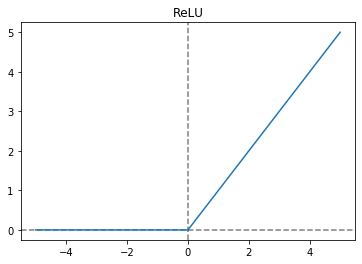

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=1000)
y = np.where(x >= 0, x, 0)
plt.axhline(0.0, color="k", alpha=0.5, linestyle="--")
plt.axvline(0.0, color="k", alpha=0.5, linestyle="--")
plt.plot(x, y)
plt.title("ReLU")
plt.show()

Other activation functions are the sigmoid function or the hyperbolic tangent.

The sigmoid:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

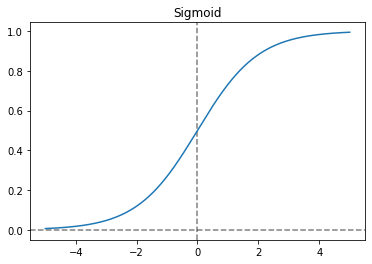

In [2]:
x = np.linspace(-5, 5, num=1000)
y = 1.0 / (1 + np.exp(-x))
plt.axhline(0.0, color="k", alpha=0.5, linestyle="--")
plt.axvline(0.0, color="k", alpha=0.5, linestyle="--")
plt.plot(x, y)
plt.title("Sigmoid")
plt.show()

The hyperbolic tangent:

$$
\tanh(x) = \frac{2}{1 + e^{-2x}} - 1
$$

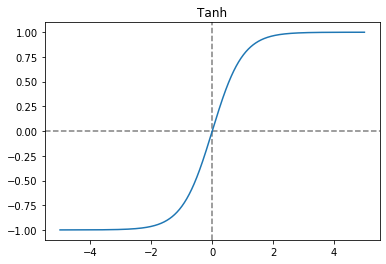

In [3]:
x = np.linspace(-5, 5, num=1000)
y = np.tanh(x)
plt.axhline(0.0, color="k", alpha=0.5, linestyle="--")
plt.axvline(0.0, color="k", alpha=0.5, linestyle="--")
plt.plot(x, y)
plt.title("Tanh")
plt.show()

Empirically, ReLU outperforms these other functions as a general activation function, though there are specific applications (such as classification) where these other activation functions may perform better. If the ReLU does not provide sufficiently robust results for training or validation, then the _leaky ReLU_ can be used. For this activation function, instead of negative values simply being identically 0, there is a scaling $\alpha$ applied (typically of order 0.2) that makes the ReLU behave better in certain conditions. Mathematically:

$$
\mathrm{Leaky\ ReLU}(x) = 
\begin{cases}
x & x \geq 0 \\
\alpha x & x < 0
\end{cases}
$$

Visually, with $\alpha = 0.2$:

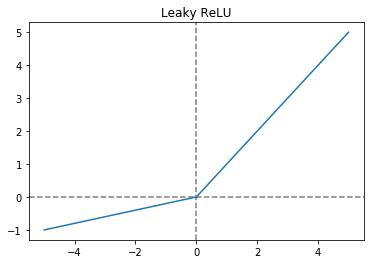

In [4]:
x = np.linspace(-5, 5, num=1000)
alpha = 0.2
y = np.where(x >= 0, x, alpha * x)
plt.axhline(0.0, color="k", alpha=0.5, linestyle="--")
plt.axvline(0.0, color="k", alpha=0.5, linestyle="--")
plt.plot(x, y)
plt.title("Leaky ReLU")
plt.show()

## Loss Function
To evaluate how good of a job the network did, we define a _loss function_. Simply put, the loss function quantifies whether the network did a "good" or "bad" job. Some common choices are the absolute error or square error. Mathematically, we can write the absolute error loss function $l_a(\vec{y}_\mathrm{out})$ as:
$$
l_a = \sum_i^N |y_\mathrm{out}(i) - y_\mathrm{true}(i)|.
$$
The square error loss function $l_s(\vec{y}_\mathrm{out})$ is:
$$
l_s = \sum_i^N |y_\mathrm{out}(i) - y_\mathrm{true}(i)|^2.
$$
Generally the square loss function is preferred, because it encourages the network to prefer making smaller errors, because larger deviations from the true answers are larger (and hence are "worse" answers). In general, the ML network is attempting to minimize the loss function for any given input.


## Hidden Layer
Hidden layers are any layers of neurons in between the input and output layers. They serve to add complexity to the network, which is (sometimes) necessary to be able to solve complex problems. The shape of these intermediate hidden layers are not constrained to the same degree that our input or output layers are: the input size is dictated by the properties of the network input (e.g., the size of input images), and the output size is dictated by what we're trying to learn from the network (e.g., parameter prediction or category classification). Additionally, there may be multiple intermediate hidden layers that come between the input and output layers. These decisions about the number and size of the input layers are collectively referred to meta-parameters of the ML network (as opposed to the actual parameters of the weights and biases). Fine-tuning the performance of the network by changing these meta-parameters is largely driven by heurestics or trial-and-error, rather than brute force searches (which are generally computationally inefficient). For most of the applications we'll look at, there are a few (3-5) hidden layers used, with sizes comparable to the input layers.

## Forward Propagation
Forward propagation is the entire process of taking input data, applying our ML model to it, and deriving output values. Initially, the forward propagation will produce results that are not well-matched to the data, because we typically initialize the ML network with random numbers. We need some process to take the output for the forward propagation of a specific guess and intelligently twiddle the weights and biases until we get better answers. One of the most common ways to do this is through _back propagation_ (described below).

## Back Propagation
Back propagation is one of "secret ingredients" that makes ML applications successful. In short, when a neural network makes a prediction based on the input data (by applying forward propagation), it will almost certainly be wrong. In order to "learn", i.e., make a better guess in the future, the ML network uses a technique known as _back propagation_. The weights and biases that compose the neural network are adjusted so that the network would have made a better guess _for the given input_. This process is repeated a large number of times for a large number of different input datasets, with the weights and biases each updated accordingly to make the prediction better. As mentioned above, back propagation is done with the goal of minimizing the loss function. There are several different ways to optimize the loss function, but back propagation is one of the most common.

## Training vs. Testing Data
As part of the ML network training process, we generally have two different phases: _training_ and _testing_. In the training phase, we use the input data and associated correct answers to update the weights and biases of the network to improve the accuracy of the network's predictions. In the testing phase, we use separate data that the network has not seen as part of the training phase to evaluate how good of a job the network is doing. It would be sort of cheating to use data that the machine already has seen the right answer for, so we make sure that the testing data is not part of the training pool. So before we begin the business of training our network, we divide our data into the testing and training groups. Typically we use an 80/20 split (where 80% of the data is used for training, and 20% is used for testing) or a 90/10 split.

## Batch Size
When we are training our ML network, we use a set of input values and the associated label to update the weights and biases. In principle, we can do this process for each input/label pair one at a time, but this is relatively inefficient for a large dataset. The _batch size_ is the number of input/label pairs that we evaluate at a given time to speed up the training of the network. When fitting an ML network, the user can specify the batch size, or allow the library to choose a default value. Changing the batch size primarily affects the speed of training the network (rather than the ultimate accuracy), but there may be small differences based on the order/combination of input data the network receives.

## Epoch
To train an ML network, we iteratively update the weights and biases until we have made our way through the entire training dataset. The first time that the network is trained, the weights and biases are initially random, and much of the time is spent getting them to yield "pretty good" results. Accordingly, the accuracy of the ML network can usually be improved by passing through the training dataset again, but starting with the initial weights and biases from the end of the first pass of training the data. We don't want to repeat this process too many times, though, because eventually the network will _overfit_ the data, and yield predictions that are tailored too closely to the training data that has been seen multiple times rather than more general input data. We usually use 3-5 epochs when training networks, to help improve the accuracy without overfitting.

## Stochastic Gradient Descent (SGD)
_Stochastic gradient descent_ is one of the most common ways to accomplish back propagation. The mathematical technique of gradient descent is a well-worn method for identifying the minimum of a multi-variate function, and has been well-optimized as part of numerical libraries. The _stochastic_ part of SGD comes from the fact that we do not compute the full gradient function all of the training data (which would be very computationally expensive), but instead compute the gradient for just a single batch of data. One can show rigorously that we'll eventually converge on the full answer even if we only use random subsets of the data (in the batch size).

# Let's Dive Right In
One of the best ways to understand what's going on behind the scenes is to work out a ML network "by hand". We'll only do this once (because it's a lot of arithmetic that's not illuminating on its own), but it helps to understand what the machine is doing while it's "learning". For the purpose of this example, we'll use a dense neural network (DNN).

## Network Design
As mentioned above, when designing an ML application, there are several choices the programmer makes that affect the overall performance and efficiency of the learning process, as well as the accurracy of the final predictions. For the purpose of this example, we'll ignore the problem of optimizing the meta-parameters, and instead focus on the nuts and bolts of training and testing neural networks.

So, for the purpose of this example, let's suppose our input layer $\vec{x}_0$ consists of 5 values, and we are trying to regress (predict) on a single output value $y_\mathrm{out}$. We'll use a single hidden layer consisting of 3 neurons, and have dense connections between the different layers in our network. We'll use a ReLU activation function, and a square error loss function. So, our network looks like this:

1. Input layer (5 neurons)
2. Dense layer (3 neurons)
3. ReLU activation function
4. Dense layer (1 neuron)
5. Square error loss function

### Activity: Draw it!
Sketch what you think the network looks like. Generally, when visualizing we draw the neurons and the weights connecting them, without necessarily including the activation functions.

## Network Initialization
When we first define and create the neural network, weights and biases are typically given random initial values. Over the course of training, we'll update these values to make our predictions more accurate. But for the sake of example, we'll come up with some random values on the interval [-1, 1] to serve as the starting values for the weights, and arbitrarily use 0.1 for the all bias values.

### Dense Layer 1
Our hidden dense layer consists of 3 neurons. Our input layer has 5 neurons. So, we can represent the weights as a 5x3 matrix, where each element is the weight connecting a particular input neuron to a specific hidden neuron. Let's initialize them with random numbers:

In [5]:
import numpy as np
np.random.seed(14)
w1 = np.random.uniform(-1.0, 1.0, size=(3, 5))
# see what we started with
print(w1)

[[ 0.02788669  0.5463301   0.74085537 -0.9839061  -0.38052815]
 [ 0.91520748  0.02623342 -0.36343115  0.07839987 -0.55749012]
 [ 0.61296272 -0.31549075  0.0777777  -0.98825243  0.34630496]]


### Dense Layer 2
Our output layer consists of a single neuron (one output parameter we're regressing on), and so the connections between the hidden neurons and the output neuron is a 3x1 matrix. Let's make a random starting state for these weights too.

In [6]:
w2 = np.random.uniform(-1.0, 1.0, size=(1, 3))
# see what we started with
print(w2)

[[-0.57995148  0.86511519 -0.2515105 ]]


## Forward Propagation
Now that we've initalized our ML network, we need to go about training it. To do this, we run a _forward propagation_ step. This means that we take the input data and apply our ML model to it. At the end, we'll have a (wrong) answer, which we'll use to update our network accordingly. But first thing's first: let's propagate our input through our model and see what comes out!

For this example, let's suppose that our input (5 neurons) had values $\vec{x}_0 = (0.3, -1.6, 4.2, 1.0, -0.3)$, and the correct answer should be $y_\mathrm{true} = 3.2$.


### Dense Layer 1
Mathematically, the value for a given hidden neuron $n_i$ is the sum over all input neurons multiplied by their weights, plus the overall bias for that neuron $b_i$. In other words:
$$
n_i = b_i + \sum_{j=1}^{N_\mathrm{in}} W_{ij} x_j
$$
Because in general our network can have multiple layers in it, we'll use a super script to mark that this is layer 1. In other words, for this layer, we have:
$$
n_i^{(1)} = b_i^{(1)} + \sum_{j=1}^{N_\mathrm{in}} W_{ij}^{(1)} x_j
$$
Let's actually crank through the math to see what our output is.

In [7]:
x0 = np.array([0.3, -1.6, 4.2, 1.0, -0.3])
b0 = 0.1
hidden_neurons = b0 + np.matmul(w1, x0)
print(hidden_neurons)

[ 1.47608274 -0.94817516  0.02319643]


### Activation Layer
The numbers we have above are the intermediate values of the hidden neurons. As mentioned above, we want to apply a ReLU activation function to our neurons:
$$
a_i^{(1)} = \mathrm{ReLU}\left(n_i^{(1)}\right)
$$
A simple way to implement this is the `np.maximum` function: We just take the max of our actual hidden neuron values or 0, element-wise. (Why does this work?) Let's implement it:

In [8]:
activated_neurons = np.maximum(hidden_neurons, 0)
print(activated_neurons)

[1.47608274 0.         0.02319643]


### Dense Layer 2
The next step is to propagate the value of these hidden neurons through our next layer. Mathematically, we have:
$$
n_i^{(2)} = b_i^{(2)} + \sum_j W_{ij}^{(2)} a_j^{(1)}
$$
As before, we can use simple matrix multiplication to accomplish this.

In [9]:
output_neuron = b0 + np.matmul(w2, activated_neurons)
print(output_neuron)

[-0.76189051]


### Loss Function
We said above that our true answer should be $y_\mathrm{true} = 3.2$. Our output value ($y_\mathrm{out} = -0.76$) is not very close at all! We'll have a relatively large result for our loss function. We said that we'd use the square error loss function:
$$
\mathrm{loss} = L = \sum_i |y_\mathrm{out}(i) - y_\mathrm{true}(i)|^2
$$
In our case, the loss is a single value, but in general we sum the error for all of our output neurons.

In [10]:
y_true = 3.2
loss = np.abs(output_neuron[0] - y_true)**2
print("loss: ", loss)

loss:  15.696576410009438


## Back Propagation
Now the "learning" part of our machine learning application: we need to take the result of our input and decide how to update our weights and biases to do better next time. We use the technique of back propagation, which is just a fancy way of applying the chain rule from calculus. We'll be using the "plain vanilla" gradient descent method. Throughout the years, people have devised more complicated and efficient methods for training ML networks. However, most of them are building on the basic concept of stochastic gradient descent (SGD), and so we'll use that as our optimizer for back propagation.

### Writing the Loss Function
Formally, our loss function $L$ is a complicated function that depends on the values of all the weights and biases that we have in our network. If we were to write it out explicitly, we'd have something like:
$$
\mathrm{loss} = L(b_0^{(1)}, W_{00}^{(1)}, W_{01}^{(1)}, \ldots)
$$
So to compute the gradient, we take the sum of the partial derivatives of the function with respect to all of the components. Mathematically:
$$
\nabla L = \frac{\partial L}{\partial b_0^{(1)}} + \frac{\partial L}{\partial W_{00}^{(1)}} + \frac{\partial L}{\partial W_{01}^{(1)}} + \cdots
$$
The next question to ask is, "How do we compute these partial derivatives?" It's actually relatively straightforward, and not as bad as you might think! Let's take a look at the connection between the hidden layer and the output neuron in detail.

First, let's write the loss function out explicitly, but _just_ in terms of the output neuron value and the "true" value:
$$
L = (y_\mathrm{out} - y_\mathrm{true})^2.
$$
Now, let's write the expression for the output neuron as a function $z$, which depends on the (activated) hidden neurons, bias, and weights:
$$
z =  y_\mathrm{out} = b_0^{(2)} + \sum_j W_{ij}^{(2)} a_j^{(1)}
$$
To compute the gradient with respect to the parameters in my model, I can simply apply the chain rule: to get the value for a particular weight (say $W_{00}^{(2)}$), I can write:
$$
\begin{align}
\frac{\partial L}{\partial W_{00}^{(2)}} &= \frac{\partial L}{\partial z} \frac{\partial z}{\partial W_{00}^{(2)}} \\
&= \left[2(z - y_\mathrm{true})\right] \cdot \left[a_0^{(1)} \right]
\end{align}
$$
Now with respect to the bias $b_0^{(2)}$:
$$
\begin{align}
\frac{\partial L}{\partial b_0^{(2)}} &= \frac{\partial L}{\partial z} \frac{\partial z}{\partial b_0^{(2)}} \\
&= \left[2(z - y_\mathrm{true})\right] \cdot \left[1 \right]
\end{align}
$$
And finally, with respect to an activation neuron in the hidden layer:
$$
\begin{align}
\frac{\partial L}{\partial a_0^{(2)}} &= \frac{\partial L}{\partial z} \frac{\partial z}{\partial a_0^{(2)}} \\
&= \left[2(z - y_\mathrm{true})\right] \cdot \left[W_{00}^{(2)} \right]
\end{align}
$$
We don't put this value into the gradient directly, but we _do_ need it to compute the partial derivatives for earlier layers. Also note that we didn't need to take into account the derivatives of our activation functions (because we did not apply one in the last step), but for earlier steps in the network, we would need to.

So, to bring it all home, the gradient is the sum of all of these terms, where we've taken the derivative with respect to all of the model parameters. To adjust our model parameters, we nudge them in the direction of making the loss function smaller (i.e., by subtracting the gradient), multiplied by a factor called the _learning rate_ $\eta$ (so that we don't overcorrect when moving through our highly dimensional parameter space). Mathematically, for each weight and bias (which we'll denote collectively as $w$), we compute:
$$
w \rightarrow w - \eta \nabla L
$$
For more computational expediency, we compute the gradient for an entire batch, and then average the gradient for all entries in the batch. If we have $n$ entries in our batch, we have:
$$
w \rightarrow w - \eta \sum_{i=1}^n \nabla L_i
$$

# Further Reading and Viewing
There are some great introductions on what machine learning is and how it works. If you're keen to learn more, check them out.

* [Online Textbook of Machine Learning](http://neuralnetworksanddeeplearning.com/)
  * [Associated Code](https://github.com/mnielsen/neural-networks-and-deep-learning)
* [Series of Blog Posts on Neural Networks](http://colah.github.io/)
* Video series on deep learning
  1. [Part 1](https://www.youtube.com/watch?v=aircAruvnKk).
  2. [Part 2](https://www.youtube.com/watch?v=IHZwWFHWa-w).
  3. [Part 3](https://www.youtube.com/watch?v=Ilg3gGewQ5U).
  4. [Part 4](https://www.youtube.com/watch?v=tIeHLnjs5U8).